In [1]:
import sys
sys.path.insert(0, "/Users/aryakakodkar/Documents/qerasure/python")
sys.path.insert(1, "/Users/aryakakodkar/Documents/qerasure/build")

In [2]:
from qerasure.visualize import visualize_code, visualize_gates
from qerasure_python import RotatedSurfaceCode

In [3]:
code = RotatedSurfaceCode(distance=3)

9 13


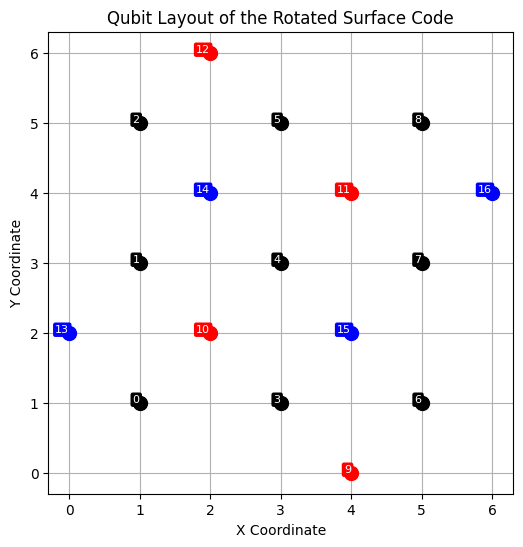

In [4]:
visualize_code(code)

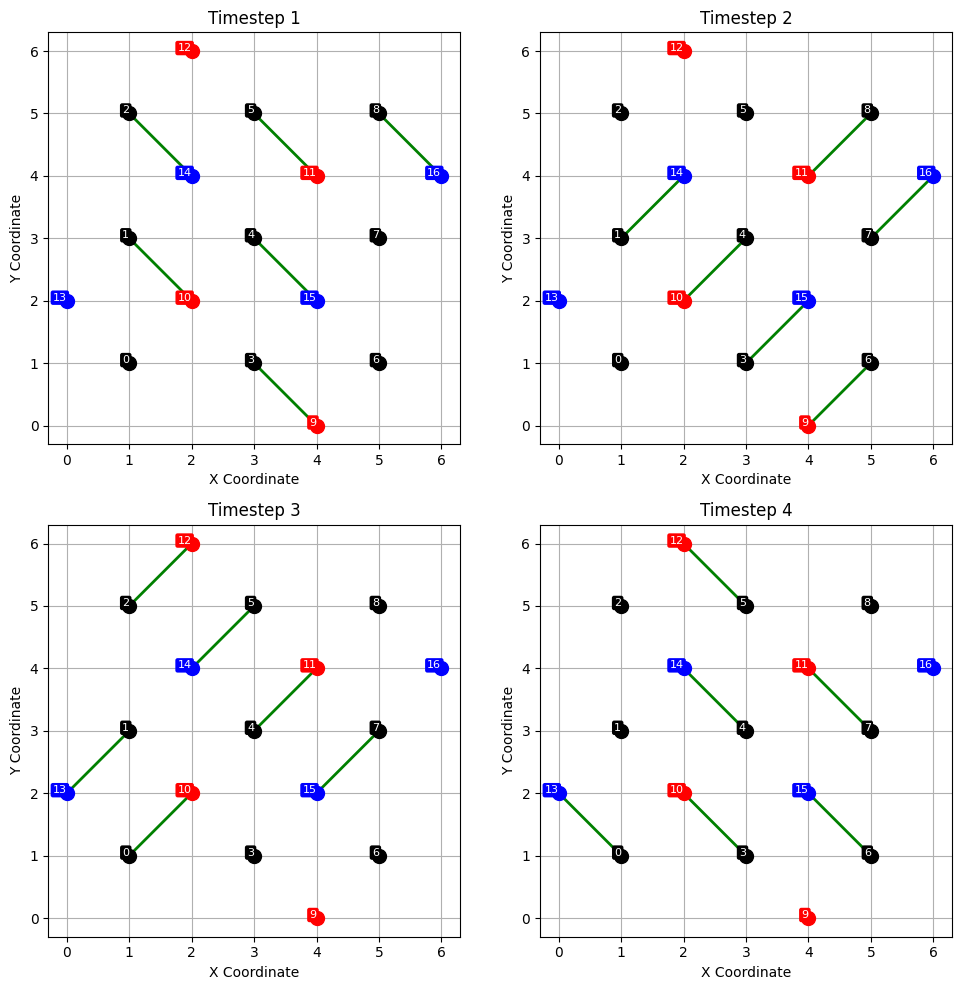

In [5]:
visualize_gates(code)